In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.symmetry_scores import get_scores_full

from transformers import AutoModelForSeq2SeqLM

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dir = '../../../../_data/fig-symmetry-language-models/full-models/MT5Decoder-query-key.pkl'

if os.path.isfile(dir):
    with open(dir, 'rb') as file:
        models = pickle.load(file)
else: models = {}

In [3]:
path = ["decoder.block[", "].layer[0].SelfAttention.q.weight", "].layer[0].SelfAttention.k.weight"]

'MT5 small model (l = 6, d = 512, h = 8 ; tot num parameters 60.5M)'
dh = 64
l = 6
d = 512
h = d // dh

model = AutoModelForSeq2SeqLM.from_pretrained("google/mt5-small")
score_List= get_scores_full(d, l, h, dh, model, path)
models['MT5-small'] = [l, d, h, dh, score_List]

'uMT5 small model (l = 6, d = 512, h = 8 ; tot num parameters 60.5M)'
dh = 64
l = 6
d = 512
h = d // dh

model = AutoModelForSeq2SeqLM.from_pretrained("google/umt5-small")
score_List= get_scores_full(d, l, h, dh, model, path)
models['uMT5-small'] = [l, d, h, dh, score_List]

'MT5 base model (l = 12, d = 768, h = 12 ; tot num parameters 223M)'
dh = 64
l = 12
d = 768
h = d // dh

model = AutoModelForSeq2SeqLM.from_pretrained("google/mt5-base")
score_List= get_scores_full(d, l, h, dh, model, path)
models['MT5-base'] = [l, d, h, dh, score_List]

'MT5 base model (l = 12, d = 768, h = 12 ; tot num parameters 223M)'
dh = 64
l = 12
d = 768
h = d // dh

model = AutoModelForSeq2SeqLM.from_pretrained("google/umt5-base")
score_List= get_scores_full(d, l, h, dh, model, path)
models['uMT5-base'] = [l, d, h, dh, score_List]

'MT5 large model (l = 24, d = 1024, h = 16 ; tot num parameters 738M)'
dh = 64
l = 24
d = 1024
h = d // dh

model = AutoModelForSeq2SeqLM.from_pretrained("google/mt5-large")
score_List= get_scores_full(d, l, h, dh, model, path)
models['MT5-large'] = [l, d, h, dh, score_List]

'MT5 3b model (l = 24, d = 4096, h = 32 ; tot num parameters 2.85B)'
## Wq and Wk have dim [4096, 1024], must use some sort of group attention
dh = 64
l = 24
d = 4096
h = d // dh

model = AutoModelForSeq2SeqLM.from_pretrained("google/mt5-xl")
score_List= get_scores_full(d, l, h, dh, model, path)
models['MT5-xl'] = [l, d, h, dh, score_List]

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [4]:
'save'
with open(dir, 'wb') as file:
    pickle.dump(models, file)

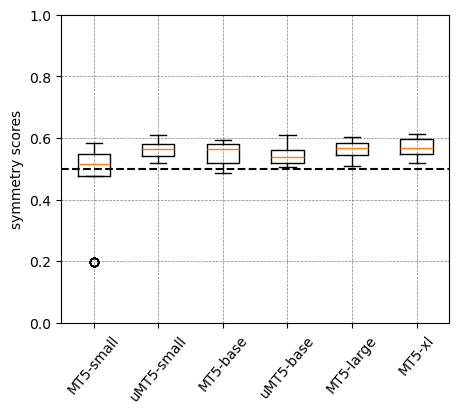

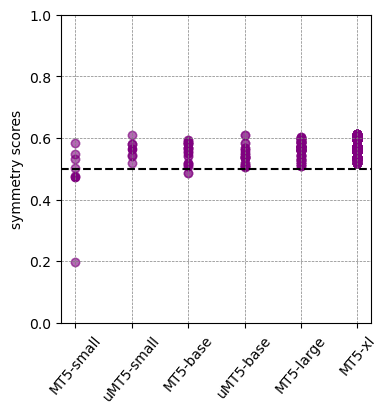

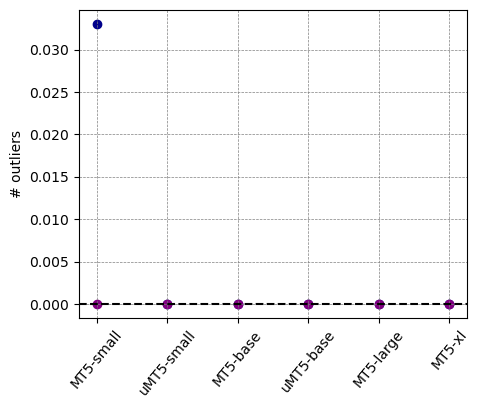

In [5]:
from utils.visualization import symmetry_score_boxplot, symmetry_score_scatter, symmetry_score_outliers

symmetry_score_boxplot(models)
symmetry_score_scatter(models)
symmetry_score_outliers(models)